In [1]:
#Given a set of points, i.e. player positions,
# the Voronoi diagram divides the space in to zones. 
#Each player's zone is the area of the pitch that is closer to that player than to any other. In other words,
#the zone is the areas of the pitch the player would get to first (assuming all players run at the same speed).

#plotting players individual position manually at a particular instance by feeding the data.

#import the packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from mplsoccer import Pitch

In [2]:
#6 list in df
barca_x=[93,96,99,102,104,95,86,79,89]
barca_y=[9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int))

opp_x=[99,100,102,104,104,102,97,98,94,77]
opp_y=[14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int))

In [3]:

# team label: 0 for barca and 1 for cadiz

df = pd.DataFrame({
    'x':barca_x + opp_x,
    'y':barca_y + opp_y,
    'team': barca + opp
    })

In [4]:
df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


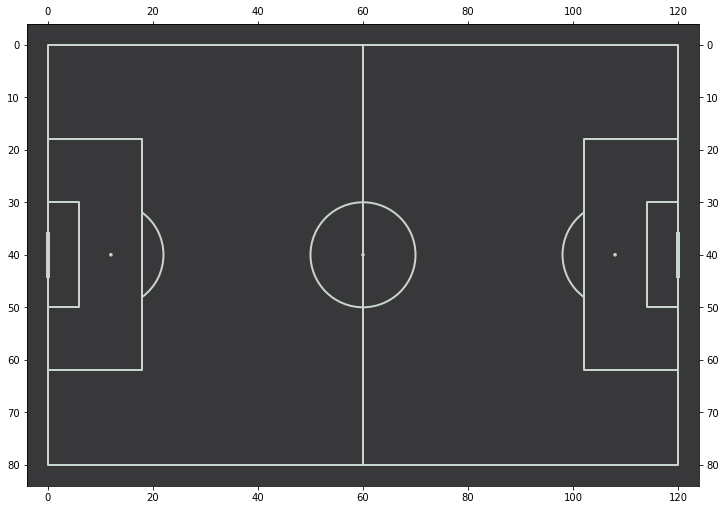

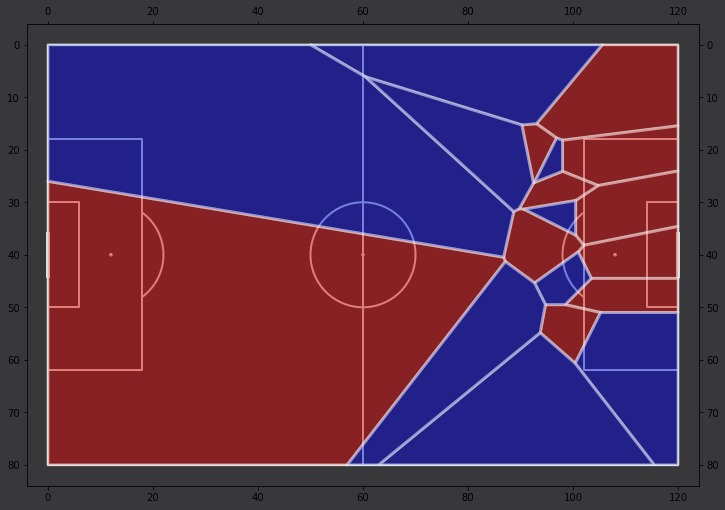

In [6]:
#creating pitch
fig, ax = plt.subplots(figsize=(13,8.5))

#The statsbomb pitch from mplsoccer
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#38383b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, view='half',axis=True,label=True,tick=True)

pitch.draw(ax=ax)

#pitch.scatter(93,9,ax = ax)

#creating apoint array 
points =np.column_stack((df.x,df.y))


#creating varanoi graph
fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch.draw(ax=ax)

x = df.x
y = df.y
team1, team2 = pitch.voronoi(x,y,df.team)

#cadiz
t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=0.4)
#barcelona
t2 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=0.4)
